<a href="https://colab.research.google.com/github/junuimoon/DoitDeeplearning/blob/master/Chapter_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

loss 변수를 'hinge'로 바꾸게 되면, SVM(서포트 벡터 머신) 문제를 푸는 모델로 만들어진다.

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

테스트 세트로 모델을 튜닝하면 실전에서 좋은 성능을 기대하기 어렵다.

왜? 아이에게 덧셈 문제의 답안지를 외우게 한것처럼, 테스트 세트에서만 좋은 성적을 낼 가능성이 있기 떄문.


그렇다면?

검증세트를 준비하면 됨! (테스트 세트는 한번 정도만 써서 사용하면 됨)

훈련세트의 비중을 80퍼센트에서 60퍼센트로 낮추고, 검증세트에 20퍼센트를 할당하자

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state = 42)       #여기서 훈련세트와 테스트 세트를 8:2로 분할했음.

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size = 0.2, random_state = 42)

print(len(x_train), len(x_val))

364 91


In [8]:
sgd = SGDClassifier(loss = 'log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)                             # 앞의 실습에서 얻은 평가 점수보다 낮아졌음 ( 훈련 세트의 크기가 줄어들었기 때문!)

0.6923076923076923

데이터 전처리와 특성의 스케일 알아보기

실제 데이터들은 가공되지 않고, 날 것들의 정보들이 많기 때문에 데이터들이 균일하지 않은 경우가 많다. 

이러한 데이터들을 적절히 가공하는 과정을 데이터 전처리라고 한다.


예를 들어 사과의 당도가 1에서 10 사이고, 사과의 무게가 500에서 1000이라고 하면, 이러한 경우엔 스케일의 차이가 크다고 얘기한다. 

경사하강법은 스케일에 민감하기 때문에, 특성의 스케일을 맞추는 전처리과정을 거쳐야 한다.

['mean perimeter' 'mean area']


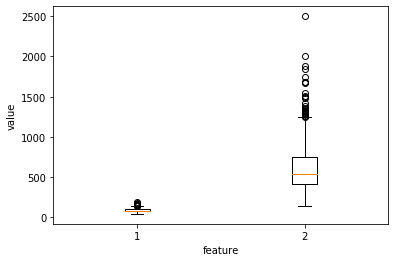

In [9]:
# 훈련 데이터  준비하고 스케일 비교하기

print(cancer.feature_names[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [0]:
#가중치를 기록할 변수와 학습률 파라미터 추가하기

def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate             # 하이퍼 파라미터, 학습률을 의미하는데, 이 값으로 가중치 업데이트 양을 조절하게 됨.